In [1]:
import os
import h5py
import io
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
from numpy import linalg as LA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [2]:
proj_dir = os.path.abspath('.')
controllers_dir =  os.path.join(proj_dir,'controllers')

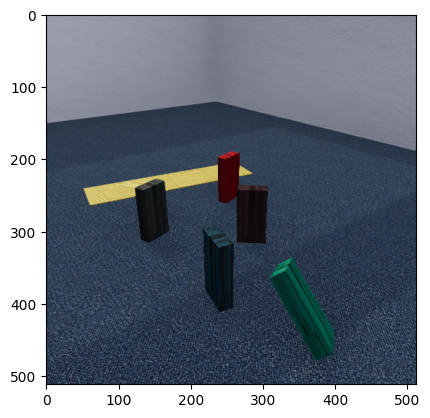

In [3]:
stim_name = '0000'
frame_idx = '0023'
file_path = os.path.join(data_dir, stim_name+'.hdf5')
h5_file = h5py.File(file_path, 'r')
img = Image.open(io.BytesIO(h5_file['frames'][frame_idx]['images']['_img'][()]))
plt.imshow(img)

In [16]:
trial_idx = 3
file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')
with h5_file as f: # load ith hdf5 file from list
    frames = list(f['frames'])
    for i, frame in enumerate(frames):
        assert len(f['frames'][frame]['collisions']['impulses'][:]) == len(f['frames'][frame]['collisions']['object_ids'][:])
        k = 0
        for j, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
            object_id_str = '-'.join([str(x) for x in object_id_tuple])
            num_contacts = f['frames'][frame]['collisions']['num_contacts'][:][j]
            if '1' not in object_id_str: # filter target zone
                print('frame: ', i)
                print('object ids: ', object_id_str)
                print('num contacts: ', f['frames'][frame]['collisions']['num_contacts'][:][j])
                print('impulses: ', f['frames'][frame]['collisions']['impulses'][:][j])
                print("contacts: ", f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1])
                print("slice: ", f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1][:,0])
                for m in range(num_contacts-1):
                    assert (f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][m][0] == f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][m+1][0]).all()
                print('--------------------------------------------------------')
            k += int(num_contacts)


frame:  0
object ids:  5-4
num contacts:  4
impulses:  [-0.23741832  0.         -0.03131054]
contacts:  [[0.17093502 0.50000006 0.45198762]
 [0.1785125  0.         0.39452994]
 [0.1785125  0.50000006 0.39452994]
 [0.17093502 0.         0.45198762]]
slice:  [0.17093502 0.1785125  0.1785125  0.17093502]
--------------------------------------------------------
frame:  1
object ids:  5-4
num contacts:  2
impulses:  [-0.12234873 -0.00039642 -0.03454137]
contacts:  [[0.19791354 0.50040329 0.45527023]
 [0.19784887 0.00197348 0.46121958]]
slice:  [0.19791354 0.19784887]
--------------------------------------------------------
frame:  2
object ids:  5-4
num contacts:  3
impulses:  [-0.26438037 -0.00331544 -0.08672696]
contacts:  [[0.20566691 0.1885684  0.462318  ]
 [0.20373558 0.49993515 0.45650893]
 [0.20759851 0.00153304 0.46345237]]
slice:  [0.20566691 0.20373558 0.20759851]
--------------------------------------------------------
frame:  3
object ids:  5-4
num contacts:  3
impulses:  [-0.24

frame:  36
object ids:  2-6
num contacts:  2
impulses:  [1.33032566e-02 1.97441523e-06 1.56211248e-02]
contacts:  [[ 0.56564903  0.50002301 -0.06028258]
 [ 0.6240316   0.50001198 -0.11000234]]
slice:  [0.56564903 0.6240316 ]
--------------------------------------------------------
frame:  36
object ids:  5-4
num contacts:  3
impulses:  [-0.31050399  0.00146017 -0.09541194]
contacts:  [[0.20069657 0.18952696 0.46494967]
 [0.20319059 0.50092697 0.46170843]
 [0.1993925  0.00167172 0.46625215]]
slice:  [0.20069657 0.20319059 0.1993925 ]
--------------------------------------------------------
frame:  37
object ids:  2-6
num contacts:  2
impulses:  [1.30615113e-02 1.95434313e-06 1.53372623e-02]
contacts:  [[ 0.56565124  0.50002348 -0.06028496]
 [ 0.62403381  0.50001192 -0.11000471]]
slice:  [0.56565124 0.62403381]
--------------------------------------------------------
frame:  37
object ids:  5-4
num contacts:  3
impulses:  [-0.31045943  0.00147534 -0.09539902]
contacts:  [[0.20070772 0.18

In [64]:
trial_idx = 43
file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')
with h5_file as f: # load ith hdf5 file from list
    frames = list(f['frames'])
#     previous_collider_vel = 0
#     previous_collidee_vel = 0
#     previous_impulse = (0, 0, 0)
    for i, frame in enumerate(frames):
#         print(f['frames'][frame]['collisions']['object_ids'][:])
        for j, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
            object_id_str = '-'.join([str(x) for x in object_id_tuple])
            if '3' in object_id_str:
                collidee_idx = [x for x in object_id_tuple if x != 3][0]
                impulse = f['frames'][frame]['collisions']['impulses'][:][j]
                relative_velocities = f['frames'][frame]['collisions']['relative_velocities'][:][j]
                
                collider_velocity = f['frames'][frame]['objects']['velocities'][:][2]
                collidee_velocity = f['frames'][frame]['objects']['velocities'][:][collidee_idx-1]
                delta_velocities = np.subtract(collidee_velocity, collider_velocity)
#                 delta_collider_velocity = np.subtract(collider_velocity, previous_collider_vel)
#                 delta_collidee_velocity = np.subtract(collidee_velocity, previous_collidee_vel)
                print('--------------------------------------------------------')
                print('frame: ', i)
                print('collider: 3')
                print('collidee: ', collidee_idx)
                print('impulses: ', impulse)
                print('delta_velocities: ', delta_velocities)
                print('relative velocities: ', relative_velocities)
                print('corr delta relative velocities', np.dot(delta_velocities, relative_velocities)/(np.linalg.norm(delta_velocities)*np.linalg.norm(relative_velocities)))
                print('corr impulse relative velocities: ', np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities)))
                print('corr impulse delta velocities: ', np.dot(impulse, delta_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(delta_velocities)))
#                 if not np.isnan(np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities))):
#                     assert np.dot(delta_velocities, relative_velocities)/(np.linalg.norm(delta_velocities)*np.linalg.norm(relative_velocities))*np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities)) > 0
#                 print('collider velocity: ', collider_velocity)
#                 print('collidee velocity: ', collidee_velocity)
#                 print('corr with collider: ', np.dot(impulse, collider_velocity))
#                 print('corr with collidee: ', np.dot(impulse, collidee_velocity))
#                 print('delta collider velocity: ', delta_collider_velocity)
#                 print('delta collidee velocity: ', delta_collidee_velocity)
#                 print('corr with delta collider: ', np.dot(previous_impulse, delta_collider_velocity))
#                 print('corr with delta collidee: ', np.dot(previous_impulse, delta_collidee_velocity))
#                 print(np.dot(impulse, delta_collider_velocity)>np.dot(impulse, delta_collidee_velocity))
#                 previous_collider_vel = collider_velocity
#                 previous_collidee_vel = collidee_velocity
#                 previous_impulse = impulse


--------------------------------------------------------
frame:  28
collider: 3
collidee:  4
impulses:  [-1.29727459e+00 -8.36114609e-08  3.56263965e-01]
delta_velocities:  [-0.28629914  0.2991041  -0.01358709]
relative velocities:  [-0.90028071  0.33601484  0.04524915]
corr delta relative velocities 0.8974032453905405
corr impulse relative velocities:  0.9148799728012136
corr impulse delta velocities:  0.6577427596984051
--------------------------------------------------------
frame:  29
collider: 3
collidee:  4
impulses:  [-0.30335018  0.00312843  0.08381687]
delta_velocities:  [-0.1940425   0.28760213 -0.03924089]
relative velocities:  [-0.28629914  0.29910409 -0.01358709]
corr delta relative velocities 0.9825011902571654
corr impulse relative velocities:  0.6645513494184466
corr impulse delta velocities:  0.5139119752420237
--------------------------------------------------------
frame:  30
collider: 3
collidee:  4
impulses:  [-0.06618772  0.00161563  0.01830812]
delta_velocities: 

/var/folders/y7/l_zzk5zs61g34sr3wmpxwp_c0000gp/T/ipykernel_10651/4284706238.py:31: RuntimeWarning: invalid value encountered in double_scalars
  print('corr impulse relative velocities: ', np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities)))
/var/folders/y7/l_zzk5zs61g34sr3wmpxwp_c0000gp/T/ipykernel_10651/4284706238.py:32: RuntimeWarning: invalid value encountered in double_scalars
  print('corr impulse delta velocities: ', np.dot(impulse, delta_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(delta_velocities)))


--------------------------------------------------------
frame:  46
collider: 3
collidee:  4
impulses:  [-0.09582692  0.02994645  0.02583322]
delta_velocities:  [ 0.33969867  0.2982875  -0.01360412]
relative velocities:  [ 0.31015471  0.29910934 -0.01738338]
corr delta relative velocities 0.9988591281079421
corr impulse relative velocities:  -0.4745085526156748
corr impulse delta velocities:  -0.5112566882017284
--------------------------------------------------------
frame:  47
collider: 3
collidee:  4
impulses:  [-0.10906063  0.03744227  0.02937987]
delta_velocities:  [0.37318012 0.26879552 0.00947475]
relative velocities:  [ 0.33969867  0.29828751 -0.01360412]
corr delta relative velocities 0.9940790175066962
corr impulse relative velocities:  -0.48829219754112996
corr impulse delta velocities:  -0.5545866852824493
--------------------------------------------------------
frame:  48
collider: 3
collidee:  4
impulses:  [-0.14925252  0.05610628  0.04020418]
delta_velocities:  [0.413510

--------------------------------------------------------
frame:  82
collider: 3
collidee:  4
impulses:  [-0.04580878  0.19111905  0.00600764]
delta_velocities:  [-0.000498    0.00143123  0.00084825]
relative velocities:  [0.00249267 0.00229061 0.00672311]
corr delta relative velocities 0.5920863877315427
corr impulse relative velocities:  0.2459263756568355
corr impulse delta velocities:  0.8827896441410953
--------------------------------------------------------
frame:  83
collider: 3
collidee:  4
impulses:  [-0.04837673  0.20185624  0.00636123]
delta_velocities:  [-0.00043362  0.00064565 -0.00012803]
relative velocities:  [-0.000498    0.00143123  0.00084825]
corr delta relative velocities 0.7534876478175476
corr impulse relative velocities:  0.8828231729746773
corr impulse delta velocities:  0.919376949780655
--------------------------------------------------------
frame:  84
collider: 3
collidee:  4
impulses:  [-0.04826433  0.20139603  0.00635387]
delta_velocities:  [-4.1760955e-04

trial:  0


<IPython.core.display.Javascript object>


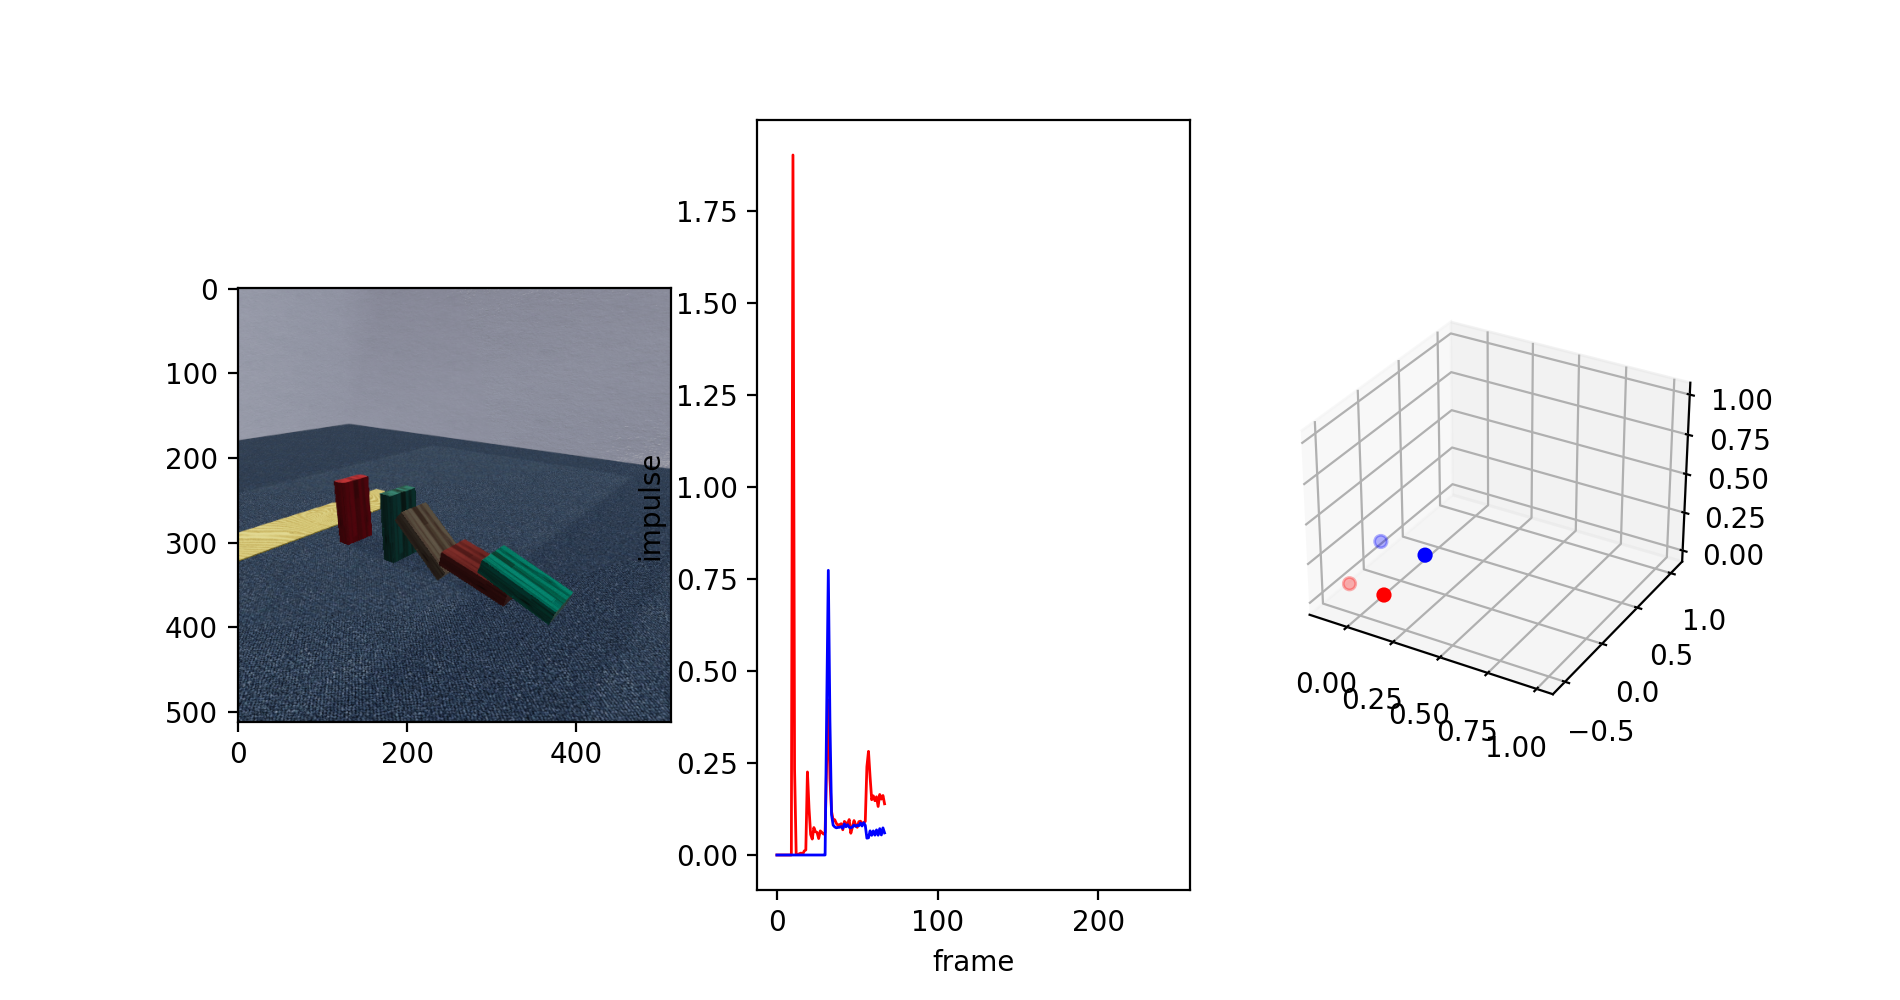

[[<matplotlib.lines.Line2D object at 0x122e6b430>, <matplotlib.image.AxesImage object at 0x12673a350>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x123af2470>], [<matplotlib.lines.Line2D object at 0x122e6bcd0>, <matplotlib.image.AxesImage object at 0x122e6b490>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122e6ba30>], [<matplotlib.lines.Line2D object at 0x122ddc550>, <matplotlib.image.AxesImage object at 0x122e6bd00>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddc2b0>], [<matplotlib.lines.Line2D object at 0x122ddcd30>, <matplotlib.image.AxesImage object at 0x122e6a8c0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddca90>], [<matplotlib.lines.Line2D object at 0x122ddd5a0>, <matplotlib.image.AxesImage object at 0x122ddcd60>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddd300>], [<matplotlib.lines.Line2D object at 0x122ddde10>, <matplotlib.image.AxesImage object at 0x122ddd5d0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122dddb70>], [<matplotlib.lines.Line2D o

In [61]:
# make dynamic figures: 3 panels
%matplotlib notebook

num_trial = 1
colors = ['red', 'blue', 'green', 'orange']
                 
for trial_idx in range(0, num_trial):
    print('trial: ', trial_idx)
    file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    
    fig = plt.figure(figsize=(9.5,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_xlabel("frame")
    ax2.set_ylabel("impulse")
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    
    ims = []
    with h5_file as f:
        frames = list(f['frames'])
        collisions = {}
        for j, frame in enumerate(frames):
            im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
            k = 0
            placeholder = ax3.plot([],[],[])
            for object_id_tuple, impulse, num_contacts in zip(f['frames'][frame]['collisions']['object_ids'][:], f['frames'][frame]['collisions']['impulses'][:], f['frames'][frame]['collisions']['num_contacts'][:]):
                object_id_str = '-'.join([str(x) for x in object_id_tuple])
                if '1' not in object_id_str: # filter target zone
                    if object_id_str not in collisions.keys():
                        collisions[object_id_str] = {'start_idx':j, 'color':colors[len(collisions)], 'impulse_norm': [LA.norm(impulse)]}
                    else:
                        collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))
                    pts = f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1]
                    placeholder.append(ax3.scatter(pts[:,2], pts[:,0], pts[:,1], c=collisions[object_id_str]['color']))
                k += int(num_contacts)

            # plotting starts here
            line = ax2.plot([], [])
            timepoints = [ind for ind in range(j+1)]
            for coll in collisions.values():
                datapoints = [0 for ind in range(coll['start_idx'])]+coll['impulse_norm']
                if len(datapoints) != len(timepoints):
                    assert len(timepoints)>len(datapoints)
                    datapoints += [0 for _ in range(len(timepoints)-len(datapoints))]
                line.append(ax2.plot(timepoints, datapoints, color=coll['color'], linewidth=1)[0])
            line.append(im)
            ims.append(line+placeholder)
    print(ims)
    if collisions:
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#         ani.save(data_dir+'/movie_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
        print('finish!')

In [ ]:
# # make dynamic figures: 2 panels (img+contact point)
# %matplotlib notebook

# num_trial = 100
# colors = ['red', 'blue', 'green', 'orange']
                 
# for trial_idx in range(0, num_trial):
#     print('trial: ', trial_idx)
#     file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#     h5_file = h5py.File(file_path, 'r')

#     fig = plt.figure(figsize=(9.5,5))
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#     ims = []
#     with h5_file as f:
#         frames = list(f['frames'])
#         contacts = {}
#         for frame in frames:
#             k = 0
#             placeholder = ax2.plot([],[],[])
#             for object_id_tuple, num_contacts in zip(f['frames'][frame]['collisions']['object_ids'][:], f['frames'][frame]['collisions']['num_contacts'][:]):
#                 object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                 if '1' not in object_id_str: # filter target zone
#                     if object_id_str not in contacts.keys():
#                         contacts[object_id_str] = {'color':colors[len(contacts)]}
#                     pts = f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1]
#                     placeholder.append(ax2.scatter(pts[:,2], pts[:,0], pts[:,1], c=contacts[object_id_str]['color']))
#                 k += int(num_contacts)
#             im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
#             placeholder.append(im)
#             ims.append(placeholder)
#     if contacts:
#         ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10)
#         ani.save(data_dir+'/movie_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
#         print("finish")

In [6]:
# for printing info purpose
# num_trial = 100
                        
# for trial_idx in range(0, num_trial):
#     print('trial: ', trial_idx)
#     file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#     h5_file = h5py.File(file_path, 'r')
#     with h5_file as f: # load ith hdf5 file from list
#         model_names = f['static']['model_names'][()]
#         middle_objects =  f['static']['middle_objects'][()]
#         object_ids =  f['static']['object_ids'][()]
#         probe_id = f['static']['probe_id'][()]
#         target_id = f['static']['target_id'][()]
#         zone_id = f['static']['zone_id'][()]
#         print('object_ids: ', object_ids, '\n', 'probe_id: ', probe_id, '\n', 'target_id: ', target_id, '\n', 'zone_id: ', zone_id, '\n', 'model_names: ', model_names, '\n', 'middle_objects: ', middle_objects)
#         frames = list(f['frames'])
#         for i, frame in enumerate(frames):
#             for object_id_tuple in f['frames'][frame]['collisions']['object_ids'][:]:
#                 object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                 if '1' in object_id_str: # filter target zone
#                     continue
#                 else:
#                     print(i)
#                     print('num contacts: ', f['frames'][frame]['collisions']['num_contacts'][:])
#                     print('contacts: ', f['frames'][frame]['collisions']['contacts'][:])
#                     print('impulses: ', f['frames'][frame]['collisions']['impulses'][:])
                    
            
#             contacts = f['frames'][frame]['collisions']['contacts'][:]
#             print(contacts)
#             object_ids = f['frames'][frame]['collisions']['object_ids'][:]
#             print(object_ids)
#             relative_velocities = f['frames'][frame]['collisions']['relative_velocities'][:]
#             print(relative_velocities)
#             states = f['frames'][frame]['collisions']['states'][:]
#             print(states)
#             impulses = f['frames'][frame]['collisions']['impulses'][:][0]
#             print(impulses)
#             velocities = f['frames'][frame]['objects']['velocities'][:]
#             print(velocities)
        

In [8]:
trial_idx = 14
file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')
with h5_file as f: # load ith hdf5 file from list
    model_names = f['static']['model_names'][()]
    middle_objects =  f['static']['middle_objects'][()]
    object_ids =  f['static']['object_ids'][()]
    probe_id = f['static']['probe_id'][()]
    target_id = f['static']['target_id'][()]
    zone_id = f['static']['zone_id'][()]
    print('object_ids: ', object_ids, '\n', 'probe_id: ', probe_id, '\n', 'target_id: ', target_id, '\n', 'zone_id: ', zone_id, '\n', 'model_names: ', model_names, '\n', 'middle_objects: ', middle_objects)
    frames = list(f['frames'])
    for i, frame in enumerate(frames):
        velocities = f['frames'][frame]['objects']['velocities'][:][2]
        print(velocities)


object_ids:  [1 2 3 4 5 6] 
 probe_id:  3 
 target_id:  2 
 zone_id:  1 
 model_names:  [b'cube' b'cube' b'cube' b'cube' b'cube' b'cube'] 
 middle_objects:  [b'cube' b'cube' b'cube']
[ 1.0622724   0.29680622 -0.1327775 ]
[ 1.0572553   0.22872218 -0.14202273]
[ 1.0480161   0.17041047 -0.152785  ]
[ 1.0419248   0.11535327 -0.16559128]
[ 1.0362729   0.06087774 -0.17843492]
[ 1.0395519   0.00801986 -0.19425535]
[ 1.036564   -0.04071543 -0.21063879]
[ 1.034303   -0.09103236 -0.22670957]
[ 1.0331938  -0.14202589 -0.24335022]
[ 1.0329101  -0.1943273  -0.25994793]
[ 1.0333253  -0.24818358 -0.27639845]
[ 1.0342631  -0.30400932 -0.29251954]
[ 0.8126226  -0.14007649 -0.06670168]
[ 0.7325764  -0.12786141 -0.00964858]
[ 0.6929543  -0.16802785  0.00688596]
[ 0.67135453 -0.18241362  0.00319621]
[ 0.6665311  -0.19304872 -0.00538205]
[ 0.661169   -0.2244916  -0.00918802]
[ 0.6588158  -0.23634359 -0.01630078]
[ 0.65564114 -0.2578379  -0.01973617]
[ 0.6518223  -0.2916863  -0.01992258]
[ 0.6514693  -0.301

In [18]:
# # make static figures
# num_trial = 100
                        
# for trial_idx in range(0, num_trial):
#     print('trial: ', trial_idx)
#     file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#     h5_file = h5py.File(file_path, 'r')
    
#     with h5_file as f: # load ith hdf5 file from list
#         frames = list(f['frames'])
#         collisions = {}
#         for frame in frames:
#             for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
#                 object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                 impulse = f['frames'][frame]['collisions']['impulses'][:][i]
#                 state = f['frames'][frame]['collisions']['states'][:][i]
#                 if object_id_str not in collisions.keys():
#                     collisions[object_id_str] = {'impulse_vec':[impulse], 'impulse_norm': [LA.norm(impulse)], 'state': [state]}
#                 else:
#                     collisions[object_id_str]['impulse_vec'].append(impulse)
#                     collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))
#                     collisions[object_id_str]['state'].append(state)
#         for key, value in collisions.items():
#             fig, ax = plt.subplots(nrows=1, ncols=1)
#             ax.plot(value['impulse_norm'])
#             fig.savefig(os.path.join(data_dir, f"{trial_idx:04}"+'coll'+'_'+key+'.png'))
#             plt.close(fig)
# print('finish!')

trial:  0


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  1


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  2


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  3


KeyboardInterrupt: 

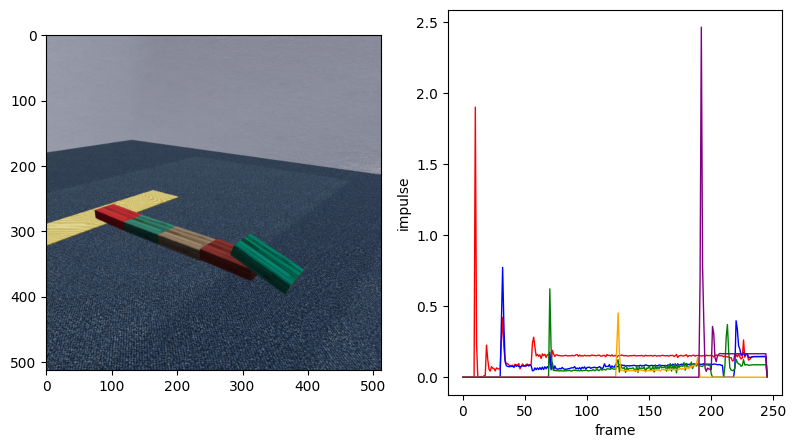

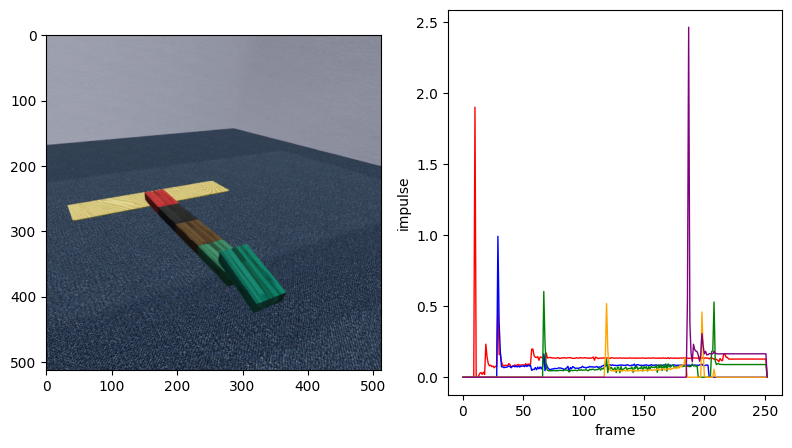

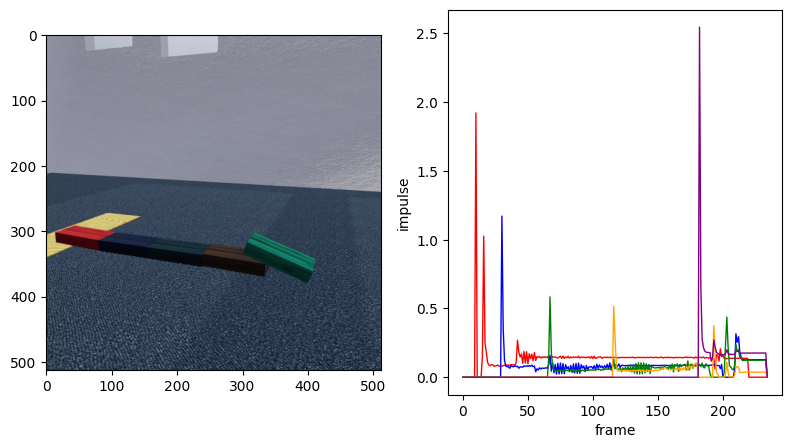

Error in callback <function flush_figures at 0x1217edbd0> (for post_execute):



KeyboardInterrupt



In [8]:
# make dynamic figures: 2 panels (img+impulse norm)
# %matplotlib notebook

num_trial = 11
colors = ['red', 'blue', 'green', 'orange', 'purple']
                 
for trial_idx in range(0, num_trial):
    print('trial: ', trial_idx)
    file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    
    fig = plt.figure(figsize=(9.5,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_xlabel("frame")
    ax2.set_ylabel("impulse")
    
    ims = []
    with h5_file as f:
        frames = list(f['frames'])
        collisions = {}
        for j, frame in enumerate(frames):
            im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
            for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                object_id_str = '-'.join([str(x) for x in object_id_tuple])

                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                state = f['frames'][frame]['collisions']['states'][:][i]
                if object_id_str not in collisions.keys():
                    collisions[object_id_str] = {'start_idx':j, 'color':colors[len(collisions)], 'impulse_vec':[impulse], 'impulse_norm': [LA.norm(impulse)], 'state': [state]}
                else:
                    collisions[object_id_str]['impulse_vec'].append(impulse)
                    collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))
                    collisions[object_id_str]['state'].append(state)

            # plotting starts here
            line = ax2.plot([], [])
            timepoints = [ind for ind in range(j+1)]
            for coll in collisions.values():
                datapoints = [0 for ind in range(coll['start_idx'])]+coll['impulse_norm']
                if len(datapoints) != len(timepoints):
                    assert len(timepoints)>len(datapoints)
                    datapoints += [0 for _ in range(len(timepoints)-len(datapoints))]
                line.append(ax2.plot(timepoints, datapoints, color=coll['color'], linewidth=1)[0])
            line.append(im)
            ims.append(line)
    if collisions:
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
        ani.save(data_dir+'/ani_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
        print('finish!')

In [3]:
# specify object
obj_idxs = [3,4]
obj_color = {'3-4': 'r', '4-5': 'b', '5-6': 'green', '2-6': 'orange', '1-2': 'purple', '4-3': 'r', '5-4': 'b', '6-5': 'green', '6-2': 'orange', '2-1': 'purple'}
num_trial = 20

# read ref file:
ref_dir =  os.path.join(controllers_dir,'tmp_ref')
# data_dir =  os.path.join(controllers_dir,'tmp_l')
data_dir =  os.path.join(controllers_dir,'tmp_h')

reference file is:  /Users/cogtoolslab/Desktop/tdw_physics/tdw_physics/noisy/controllers/tmp_ref/0000.hdf5
trial:  0
trial:  1
trial:  2
trial:  3
trial:  4
trial:  5
trial:  6
trial:  7
trial:  8
trial:  9
trial:  10
trial:  11
trial:  12
trial:  13
trial:  14
trial:  15
trial:  16
trial:  17
trial:  18
trial:  19


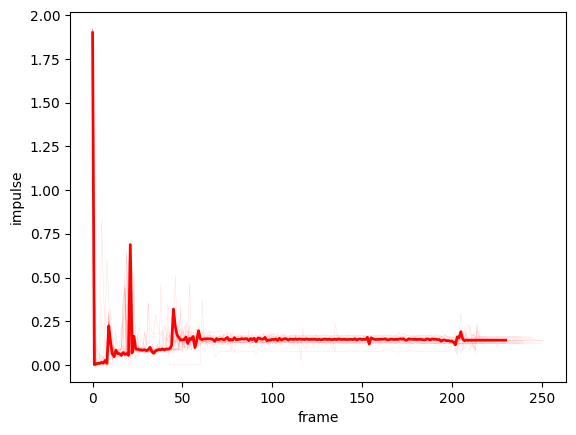

In [5]:
# make static figure: compare ref and noise magnitud



In [20]:
def plot_3d_scatter(data,ax=None,colour='red',sz=30,el=20,az=50,sph=True,sph_colour="gray",sph_alpha=0.001,
                    eq_line=True,pol_line=True,grd=False):
    ax.view_init(el, az)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)

    # Add a shaded unit sphere
    if sph:
        u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y, z, color=sph_colour,alpha=sph_alpha)

    # Add an equitorial line
    if eq_line:
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp)
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)

        # Equator line
        ax.plot(eqx,eqy,eqz,color="k",lw=1)

    # Add a polar line
    if pol_line:
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp)
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)

        # Polar line
        ax.plot(eqx,eqz,eqy,color="k",lw=1)

    # Draw a centre point
    ax.scatter([0], [0], [0], color="k", s=sz)    

    # Turn off grid
    ax.grid(grd)

    # Ticks
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    return ax.scatter(data[:,0],data[:,1],data[:,2],s=1,c=colour)


def plot_arrow(point,ax,colour="red"):
    # Fancy arrow 
    a = Arrow3D([0, point[0]], [0, point[1]], [0, point[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color=colour)
    return ax.add_artist(a)


# Drawing a fancy vector see Ref. [7] 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

<IPython.core.display.Javascript object>


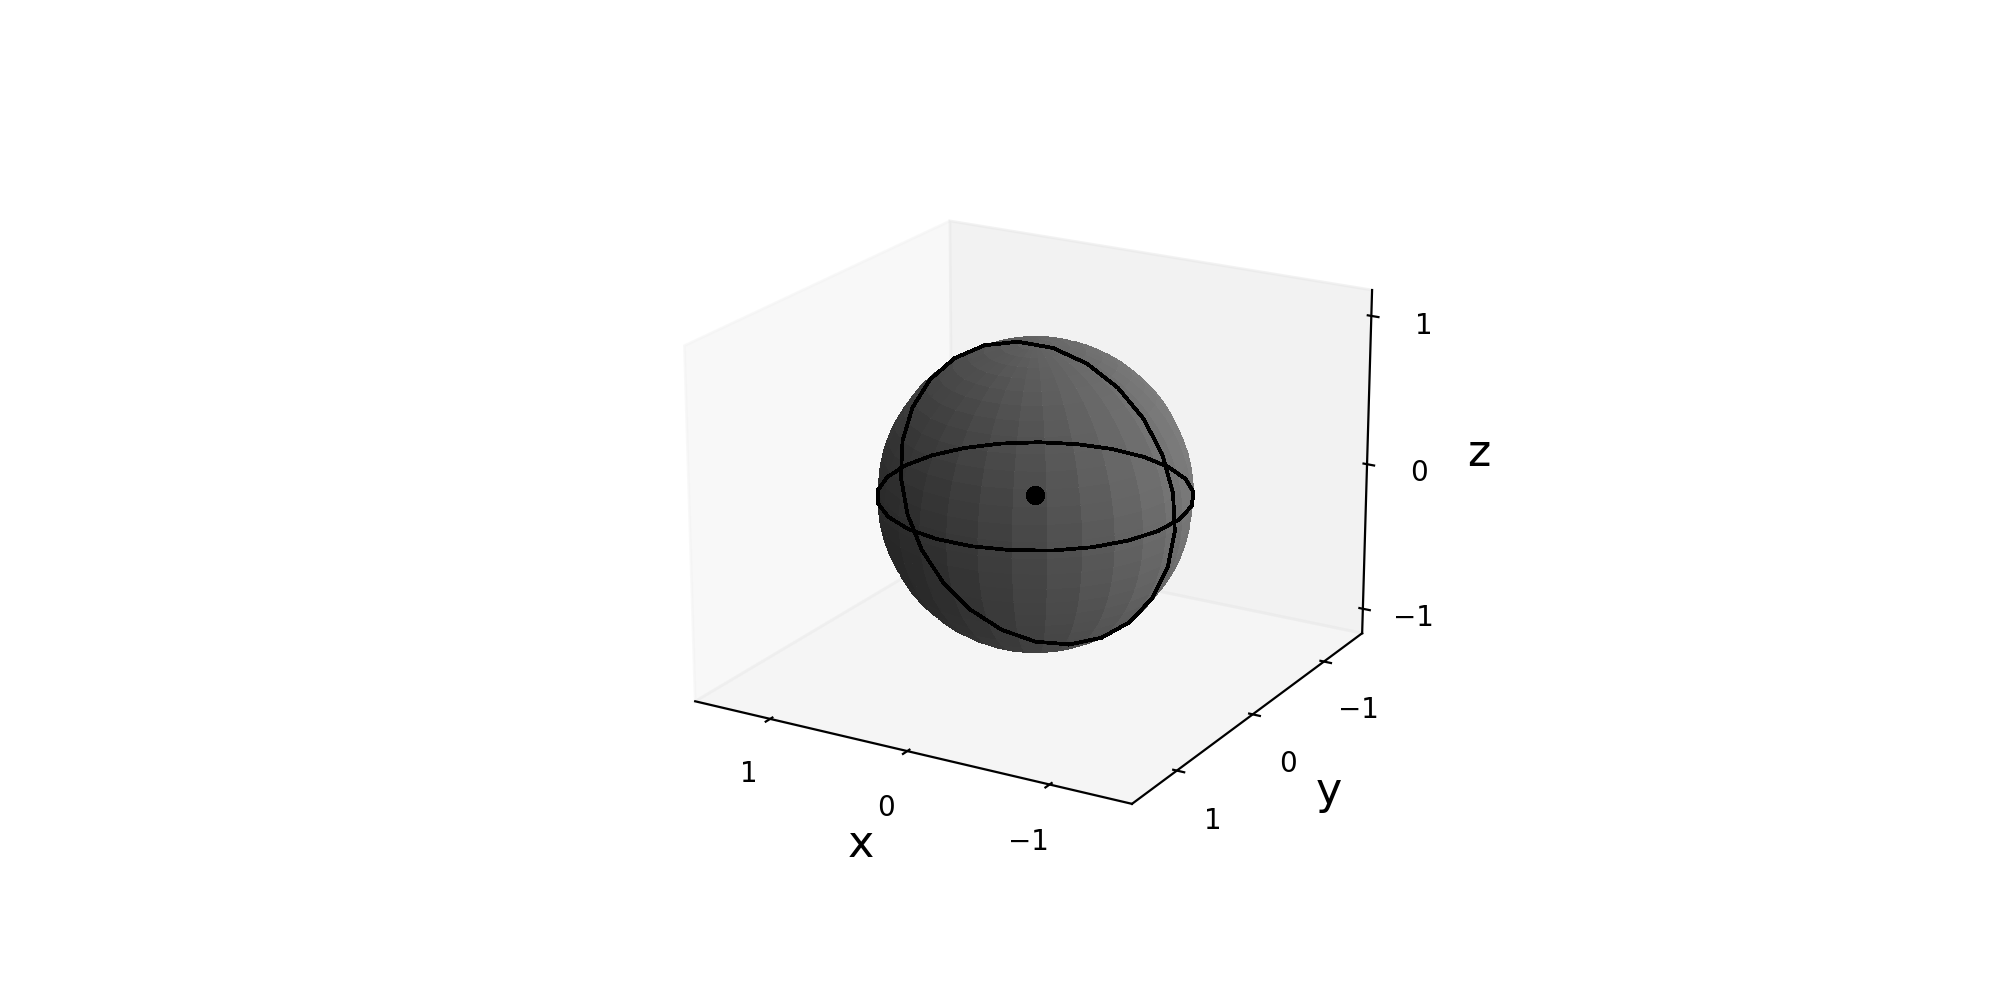

reference file is:  /Users/cogtoolslab/Desktop/tdw_physics/tdw_physics/noisy/controllers/tmp_ref/0000.hdf5
1 / 199
2 / 199
3 / 199
4 / 199
5 / 199
6 / 199
7 / 199
8 / 199
9 / 199
10 / 199
11 / 199
12 / 199
13 / 199
14 / 199
15 / 199
16 / 199
17 / 199
18 / 199
19 / 199
20 / 199
21 / 199
22 / 199
23 / 199
24 / 199
25 / 199
26 / 199
27 / 199
28 / 199
29 / 199
30 / 199
31 / 199
32 / 199
33 / 199
34 / 199
35 / 199
36 / 199
37 / 199
38 / 199
39 / 199
40 / 199
41 / 199
42 / 199
43 / 199
44 / 199
45 / 199
46 / 199
47 / 199
48 / 199
49 / 199
50 / 199
51 / 199
52 / 199
53 / 199
54 / 199
55 / 199
56 / 199
57 / 199
58 / 199
59 / 199
60 / 199
61 / 199
62 / 199
63 / 199
64 / 199
65 / 199
66 / 199
67 / 199
68 / 199
69 / 199
70 / 199
71 / 199
72 / 199
73 / 199
74 / 199
75 / 199
76 / 199
77 / 199
78 / 199
79 / 199
80 / 199
81 / 199
82 / 199
83 / 199
84 / 199
85 / 199
86 / 199
87 / 199
88 / 199
89 / 199
90 / 199
91 / 199
92 / 199
93 / 199
94 / 199
95 / 199
96 / 199
97 / 199
98 / 199
99 / 199
100 / 199
1

KeyboardInterrupt: 

In [23]:
# make static figure: compare ref and noise direction
# %matplotlib notebook

# test_frame = 0
fs = 16

# init figure
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
img = []

file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')
print('reference file is: ', file_path)

collisions_ref = []
with h5_file as f:
    frames = list(f['frames'])
    for j, frame in enumerate(frames):
        for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
            if set(obj_idx) == set(object_id_tuple):
                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                if np.array_equal(impulse,(0,0,0)):
                    collisions_ref.append((0,0,0))
                else:
                    collisions_ref.append(impulse/np.linalg.norm(impulse))
                
# read noisy file:
collisions = {}
for trial_index in range(0, num_trial):
    file_path = os.path.join(data_dir, f"{trial_index:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    with h5_file as f:
        frames = list(f['frames'])
        for j, frame in enumerate(frames):
            if j < len(collisions_ref):
                for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                    if set(obj_idx) == set(object_id_tuple):
                        object_id_str = '-'.join([str(x) for x in object_id_tuple])
                        impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                        if str(trial_index) not in collisions.keys():
                            collisions[str(trial_index)] = []
                        else:
                            if np.array_equal(impulse, (0,0,0)):
                                collisions[str(trial_index)].append((0,0,0))
                            else:
                                if np.dot(impulse, collisions_ref[j]) < 0:
                                    impulse = np.negative(impulse)
                                collisions[str(trial_index)].append(impulse/np.linalg.norm(impulse))

all_lengths = [len(x) for x in collisions.values()]
all_lengths.append(len(collisions_ref))
length = min(all_lengths)

for frame_idx in range(length):
    print(frame_idx+1, '/', length)
    impulse = collisions_ref[frame_idx]
    noisy_impulse = np.array([x[frame_idx] for x in collisions.values()])
    img.append([plot_arrow(impulse,ax1,colour=obj_color[object_id_str]), plot_3d_scatter(noisy_impulse, ax1, colour=obj_color[object_id_str])])

# Labels
ax1.set_xlabel('x',fontsize=fs)
ax1.set_ylabel('y',fontsize=fs)
ax1.set_zlabel('z',fontsize=fs)

# Viewing angle
ax1.view_init(20,120)
ax1.set_aspect('equal')
# plt.show()

print('saving!')
ani = animation.ArtistAnimation(fig, img, interval=50, blit=True, repeat=True, repeat_delay=1000)
ani.save('/Users/cogtoolslab/Desktop/haha.gif', writer='pillow', fps=10, ,dpi=1000)
print('finished')

In [16]:
# specify object
obj_idxs = [[3,4], [4,5], [5,6], [2,6], [1,2]]
obj_color = {'3-4': 'r', '4-5': 'b', '5-6': 'green', '2-6': 'orange', '1-2': 'purple', '4-3': 'r', '5-4': 'b', '6-5': 'green', '6-2': 'orange', '2-1': 'purple'}
num_trial = 15

# read ref file:
ref_dir =  os.path.join(controllers_dir,'tmp_ref')
data_dirs = [os.path.join(controllers_dir,'tmp_l'), os.path.join(controllers_dir,'tmp_h')]

fs = 16

/Users/cogtoolslab/Desktop/tdw_physics/tdw_physics/noisy/controllers/tmp_l
[3, 4]
magnitude finished!
saving direction!
Saving frame 0 of None
Saving frame 1 of None
Saving frame 2 of None
Saving frame 3 of None
Saving frame 4 of None
Saving frame 5 of None
direction finished!
[4, 5]
magnitude finished!
saving direction!


IndexError: list index out of range

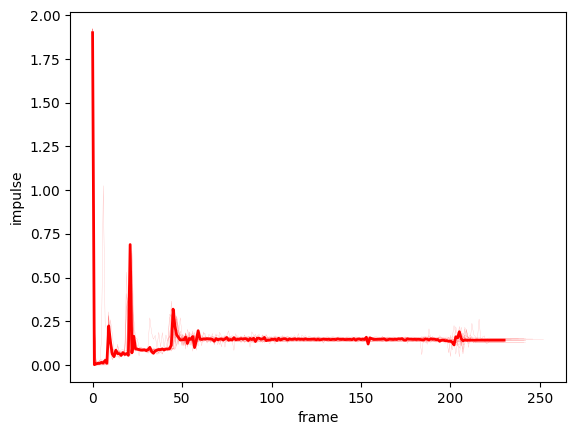

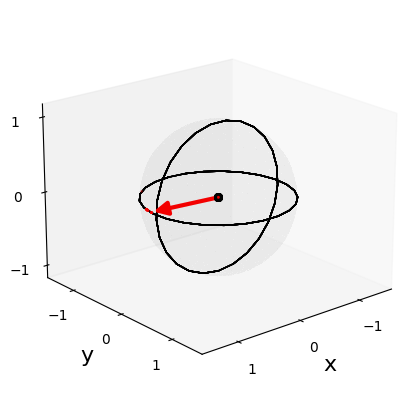

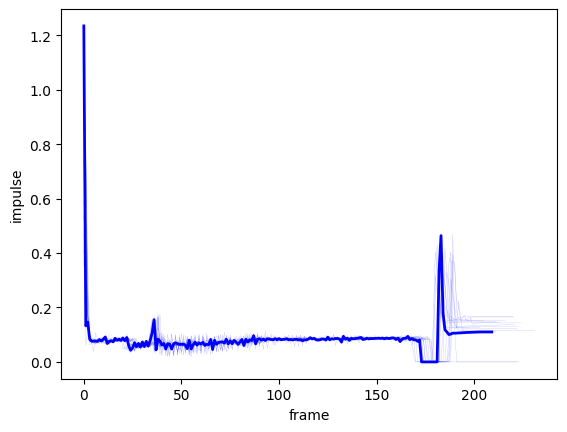

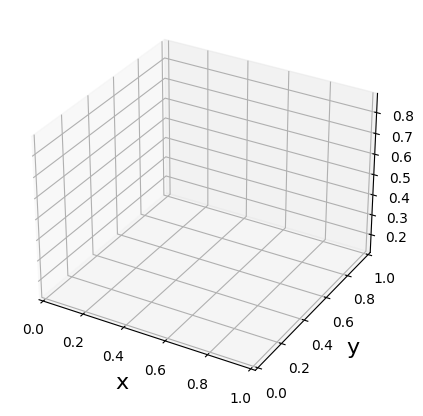

In [25]:
# make static figure: compare ref and noise magnitud

for data_dir in data_dirs:
    print(data_dir)
    for obj_idx in obj_idxs:
        print(obj_idx)

        # init figure
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.set_xlabel("frame")
        ax1.set_ylabel("impulse")

        file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
        h5_file = h5py.File(file_path, 'r')

        collisions_ref = {}
        with h5_file as f:
            frames = list(f['frames'])
            for j, frame in enumerate(frames):
                for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                    if set(obj_idx) == set(object_id_tuple):
                        object_id_str = '-'.join([str(x) for x in object_id_tuple])
                        impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                        if object_id_str not in collisions_ref.keys():
                            collisions_ref[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
                        else:
                            collisions_ref[object_id_str]['impulse_norm'].append(LA.norm(impulse))

        for key, value in collisions_ref.items():
            ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=2)

        # read noisy file:
        for trial_idx in range(0, num_trial):
            file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
            h5_file = h5py.File(file_path, 'r')
            with h5_file as f:
                frames = list(f['frames'])
                collisions = {}
                for j, frame in enumerate(frames):
                    for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                        if set(obj_idx) == set(object_id_tuple):
                            object_id_str = '-'.join([str(x) for x in object_id_tuple])
                            impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                            if object_id_str not in collisions.keys():
                                collisions[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
                            else:
                                collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))

                for key, value in collisions.items():
                    ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=0.2, alpha=0.3)
        fig.savefig(data_dir+'/'+object_id_str+'_magnitude.png')
        print("magnitude finished!")



        # init figure
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.add_subplot(1, 1, 1, projection='3d')
        img = []

        file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
        h5_file = h5py.File(file_path, 'r')

        collisions_ref = []
        with h5_file as f:
            frames = list(f['frames'])
            for j, frame in enumerate(frames):
                for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                    if set(obj_idx) == set(object_id_tuple):
                        impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                        if np.array_equal(impulse,(0,0,0)):
                            collisions_ref.append((0,0,0))
                        else:
                            collisions_ref.append(impulse/np.linalg.norm(impulse))

        # read noisy file:
        collisions = {}
        for trial_index in range(0, num_trial):
            file_path = os.path.join(data_dir, f"{trial_index:04}"+'.hdf5')
            h5_file = h5py.File(file_path, 'r')
            with h5_file as f:
                frames = list(f['frames'])
                for j, frame in enumerate(frames):
                    if j < len(collisions_ref):
                        for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                            if set(obj_idx) == set(object_id_tuple):
                                object_id_str = '-'.join([str(x) for x in object_id_tuple])
                                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                                if str(trial_index) not in collisions.keys():
                                    collisions[str(trial_index)] = []
                                else:
                                    if np.array_equal(impulse, (0,0,0)):
                                        collisions[str(trial_index)].append((0,0,0))
                                    else:
                                        if np.dot(impulse, collisions_ref[j]) < 0:
                                            impulse = np.negative(impulse)
                                        collisions[str(trial_index)].append(impulse/np.linalg.norm(impulse))

        all_lengths = [len(x) for x in collisions.values()]
        all_lengths.append(len(collisions_ref))
        length = min(all_lengths)

        for frame_idx in range(length):
            impulse = collisions_ref[frame_idx]
            noisy_impulse = np.array([x[frame_idx] for x in collisions.values()])
            img.append([plot_arrow(impulse,ax1,colour=obj_color[object_id_str]), plot_3d_scatter(noisy_impulse, ax1, colour=obj_color[object_id_str], sph_alpha=0.002)])

        # Labels
        ax1.set_xlabel('x',fontsize=fs)
        ax1.set_ylabel('y',fontsize=fs)
        ax1.set_zlabel('z',fontsize=fs)

        # Viewing angle
        ax1.set_aspect('equal')

        print('saving direction!')
        ani = animation.ArtistAnimation(fig, img, interval=50, blit=True, repeat=True, repeat_delay=1000)
        ani.save(data_dir+'/'+object_id_str+'_direction.gif', writer='pillow', fps=10, dpi=300, progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'))
        print('direction finished!')
